In [1]:
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from func1 import *
from query2 import *
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [15]:
df = data1()

In [16]:
df.tail(5)

,datetime,fore24,tail24,tail24_avg,evap,infl,losses,rel1,rel2,rel3,...,run_c1,run_c2,run_c3,spillway,irr,camp,demand,derate,outage,stor
6008,2004-01-04,150.37,80.72,0.0,0.9394,0.0000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7163.3561
6009,2004-01-03,150.40,80.76,0.0,0.9402,1.6079,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7173.6822
6010,2004-01-02,150.42,80.61,0.0,0.9407,4.3466,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7180.5712
6011,2004-01-01,150.43,81.13,0.0,0.9410,0.0000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7184.0172
6012,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [17]:
print(df.shape)

(6013, 33)


In [18]:
df.index = df['datetime']

In [19]:
df.index

Index([2020-06-28, 2020-06-27, 2020-06-26, 2020-06-25, 2020-06-24, 2020-06-23,
       2020-06-22, 2020-06-21, 2020-06-20, 2020-06-18,
       ...
       2004-01-09, 2004-01-08, 2004-01-07, 2004-01-06, 2004-01-05, 2004-01-04,
       2004-01-03, 2004-01-02, 2004-01-01,       None],
      dtype='object', name='datetime', length=6013)

In [20]:
df.index = df.index.astype('datetime64[ns]')

In [21]:
df.index

DatetimeIndex(['2020-06-28', '2020-06-27', '2020-06-26', '2020-06-25',
               '2020-06-24', '2020-06-23', '2020-06-22', '2020-06-21',
               '2020-06-20', '2020-06-18',
               ...
               '2004-01-09', '2004-01-08', '2004-01-07', '2004-01-06',
               '2004-01-05', '2004-01-04', '2004-01-03', '2004-01-02',
               '2004-01-01',        'NaT'],
              dtype='datetime64[ns]', name='datetime', length=6013, freq=None)

In [22]:
df.sort_index(inplace=True)

In [23]:
df.dropna(inplace=True)

In [25]:
df.shape

(4432, 33)

In [26]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [28]:
df.head(2)

,datetime,fore24,tail24,tail24_avg,evap,infl,losses,rel1,rel2,rel3,...,run_c1,run_c2,run_c3,spillway,irr,camp,demand,derate,outage,stor
datetime,,,,,,,,,,,,,,,,,,,,,
2004-01-01,2004-01-01,150.43,81.13,0.0,0.9410,0.0000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7184.0172
2004-01-02,2004-01-02,150.42,80.61,0.0,0.9407,4.3466,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7180.5712


In [29]:
print("dropna ", df.shape)

dropna  (4432, 33)


In [30]:
rawdata = df[['fore24']].iloc[4002:,:]

In [31]:
rawdata.shape

(430, 1)

In [32]:
rawdata.to_csv('rawdata11111111.csv')

In [33]:
dtat0 = df.iloc[-1:,0:1].values[0][0]

In [34]:
dtat0

numpy.datetime64('2020-06-28T00:00:00.000000000')

In [35]:
dti = pd.date_range(dtat0, periods=2).shift(1, freq='D')

In [36]:
dti

DatetimeIndex(['2020-06-29', '2020-06-30'], dtype='datetime64[ns]', freq='D')

In [37]:
type(dti)

pandas.core.indexes.datetimes.DatetimeIndex

In [38]:
dfdt = dti.to_frame(index=False, name='datims')

In [39]:
dfdt

,datims
0,2020-06-29
1,2020-06-30


In [40]:
df.drop(('datetime'), axis=1, inplace=True)

In [2]:
import tensorflow as tf
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available


In [41]:
df

,fore24,tail24,tail24_avg,evap,infl,losses,rel1,rel2,rel3,rel_tol,...,run_c1,run_c2,run_c3,spillway,irr,camp,demand,derate,outage,stor
datetime,,,,,,,,,,,,,,,,,,,,,
2004-01-01,150.43,81.13,0.00,0.9410,0.0000,0.0,0.0000,0.0000,0.0000,5.8779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7184.0172
2004-01-02,150.42,80.61,0.00,0.9407,4.3466,0.0,0.0000,0.0000,0.0000,6.8519,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7180.5712
2004-01-03,150.40,80.76,0.00,0.9402,1.6079,0.0,0.0000,0.0000,0.0000,7.5567,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7173.6822
2004-01-04,150.37,80.72,0.00,0.9394,0.0000,0.0,0.0000,0.0000,0.0000,8.0863,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7163.3561
2004-01-05,150.32,81.72,0.00,0.9381,0.0000,0.0,0.0000,0.0000,0.0000,15.2927,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7146.1654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,139.01,84.01,81.92,0.5502,2.5123,0.0,2.4056,3.7790,2.8385,9.0231,...,0.8,85.1,100.3,0.0,0.0,11783.0,9.0,78.0,0.0,3880.0034
2020-06-25,138.97,81.86,81.90,0.5494,1.1792,0.0,1.7800,3.6119,4.6394,10.0313,...,0.8,85.1,100.3,0.0,0.0,10696.0,10.0,78.0,0.0,3870.6019
2020-06-26,138.93,83.26,82.18,0.5485,3.2382,0.0,3.6258,4.1682,4.2823,12.0763,...,0.8,85.1,100.3,0.0,0.0,9614.0,12.0,78.0,0.0,3861.2153


In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
y_scaler = MinMaxScaler()
y_scaler.fit(df[['fore24']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [45]:
X_scaler = MinMaxScaler()

In [46]:
df[['tail24', 'tail24_avg', 'evap', 'infl', 'losses',
    'rel1', 'rel2', 'rel3', 'rel_tol', 'engr1', 'engr2', 'engr3', 'cond1',
    'cond2', 'cond3', 'str1', 'str2', 'str3', 'run_g1', 'run_g2', 'run_g3',
    'run_c1', 'run_c2', 'run_c3', 'spillway', 'irr', 'camp', 'demand',
    'derate', 'outage', 'stor','fore24']] = X_scaler.fit_transform(df)

In [47]:
df

,fore24,tail24,tail24_avg,evap,infl,losses,rel1,rel2,rel3,rel_tol,...,run_c1,run_c2,run_c3,spillway,irr,camp,demand,derate,outage,stor
datetime,,,,,,,,,,,,,,,,,,,,,
2004-01-01,0.748846,0.794376,0.162554,0.000000,0.546712,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000066,0.000000,0.000000,0.0
2004-01-02,0.748164,0.793790,0.087083,0.000000,0.546369,0.013157,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000066,0.000000,0.000000,0.0
2004-01-03,0.746802,0.792619,0.108853,0.000000,0.545798,0.004867,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000066,0.000000,0.000000,0.0
2004-01-04,0.744759,0.790861,0.103048,0.000000,0.544883,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000066,0.000000,0.000000,0.0
2004-01-05,0.741359,0.787932,0.248186,0.000000,0.543396,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000066,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,0.095328,0.125366,0.580552,0.942693,0.099828,0.007604,0.0,0.168674,0.264020,0.199141,...,0.342625,0.000526,0.056699,0.068963,0.0,0.0,0.772924,0.155172,0.866667,0.0
2020-06-25,0.093468,0.123023,0.268505,0.942463,0.098914,0.003569,0.0,0.124809,0.252346,0.325487,...,0.342875,0.000526,0.056699,0.068963,0.0,0.0,0.701627,0.172414,0.866667,0.0
2020-06-26,0.091612,0.120680,0.471698,0.945685,0.097885,0.009802,0.0,0.254232,0.291212,0.300434,...,0.343112,0.000526,0.056699,0.068963,0.0,0.0,0.630657,0.206897,0.866667,0.0


In [48]:
df.tail(2)

,fore24,tail24,tail24_avg,evap,infl,losses,rel1,rel2,rel3,rel_tol,...,run_c1,run_c2,run_c3,spillway,irr,camp,demand,derate,outage,stor
datetime,,,,,,,,,,,,,,,,,,,,,
2020-06-27,0.089758,0.118336,0.445573,0.941312,0.096855,0.003865,0.0,0.267372,0.169667,0.270758,...,0.343326,0.000526,0.056699,0.068963,0.0,0.0,0.566378,0.172414,0.866667,0.0
2020-06-28,0.087907,0.115993,0.724238,0.940967,0.095941,0.003737,0.0,0.251027,0.250299,0.202165,...,0.343485,0.000526,0.056699,0.068963,0.0,0.0,0.570641,0.172414,0.866667,0.0


In [49]:
type(df)

pandas.core.frame.DataFrame

In [50]:
type(df.values)

numpy.ndarray

In [51]:
df

,fore24,tail24,tail24_avg,evap,infl,losses,rel1,rel2,rel3,rel_tol,...,run_c1,run_c2,run_c3,spillway,irr,camp,demand,derate,outage,stor
datetime,,,,,,,,,,,,,,,,,,,,,
2004-01-01,0.748846,0.794376,0.162554,0.000000,0.546712,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000066,0.000000,0.000000,0.0
2004-01-02,0.748164,0.793790,0.087083,0.000000,0.546369,0.013157,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000066,0.000000,0.000000,0.0
2004-01-03,0.746802,0.792619,0.108853,0.000000,0.545798,0.004867,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000066,0.000000,0.000000,0.0
2004-01-04,0.744759,0.790861,0.103048,0.000000,0.544883,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000066,0.000000,0.000000,0.0
2004-01-05,0.741359,0.787932,0.248186,0.000000,0.543396,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000066,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,0.095328,0.125366,0.580552,0.942693,0.099828,0.007604,0.0,0.168674,0.264020,0.199141,...,0.342625,0.000526,0.056699,0.068963,0.0,0.0,0.772924,0.155172,0.866667,0.0
2020-06-25,0.093468,0.123023,0.268505,0.942463,0.098914,0.003569,0.0,0.124809,0.252346,0.325487,...,0.342875,0.000526,0.056699,0.068963,0.0,0.0,0.701627,0.172414,0.866667,0.0
2020-06-26,0.091612,0.120680,0.471698,0.945685,0.097885,0.009802,0.0,0.254232,0.291212,0.300434,...,0.343112,0.000526,0.056699,0.068963,0.0,0.0,0.630657,0.206897,0.866667,0.0


In [52]:
df.values

array([[0.74884594, 0.7943761 , 0.16255443, ..., 0.        , 0.        ,
        0.        ],
       [0.74816434, 0.79379028, 0.08708273, ..., 0.        , 0.        ,
        0.        ],
       [0.74680173, 0.79261863, 0.10885341, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.09161155, 0.12067955, 0.47169811, ..., 0.20689655, 0.86666667,
        0.        ],
       [0.0897579 , 0.11833626, 0.44557329, ..., 0.17241379, 0.86666667,
        0.        ],
       [0.0879072 , 0.11599297, 0.72423803, ..., 0.17241379, 0.86666667,
        0.        ]])

In [53]:
dfval = df.values

In [54]:
print(type(dfval), dfval.shape) # (1000, 32) = (sample, features)

<class 'numpy.ndarray'> (4432, 32)


In [55]:
n_steps_in, n_steps_out = 3, 2

In [64]:
X, y = split_sequences(dfval, n_steps_in, n_steps_out)
print(X.shape)

(4429, 3, 31)


In [66]:
y.shape

(4429, 2)

In [68]:
X

array([[[7.48845939e-01, 7.94376098e-01, 1.62554427e-01, ...,
         6.55909747e-05, 0.00000000e+00, 0.00000000e+00],
        [7.48164337e-01, 7.93790275e-01, 8.70827286e-02, ...,
         6.55909747e-05, 0.00000000e+00, 0.00000000e+00],
        [7.46801725e-01, 7.92618629e-01, 1.08853411e-01, ...,
         6.55909747e-05, 0.00000000e+00, 0.00000000e+00]],

       [[7.48164337e-01, 7.93790275e-01, 8.70827286e-02, ...,
         6.55909747e-05, 0.00000000e+00, 0.00000000e+00],
        [7.46801725e-01, 7.92618629e-01, 1.08853411e-01, ...,
         6.55909747e-05, 0.00000000e+00, 0.00000000e+00],
        [7.44759272e-01, 7.90861160e-01, 1.03047896e-01, ...,
         6.55909747e-05, 0.00000000e+00, 0.00000000e+00]],

       [[7.46801725e-01, 7.92618629e-01, 1.08853411e-01, ...,
         6.55909747e-05, 0.00000000e+00, 0.00000000e+00],
        [7.44759272e-01, 7.90861160e-01, 1.03047896e-01, ...,
         6.55909747e-05, 0.00000000e+00, 0.00000000e+00],
        [7.41359033e-01, 7.87932045e

<class 'numpy.ndarray'> (4410, 32)


In [69]:
X_train = X[:4000,:]
X_test = X[4000:,:]

y_train = y[:4000,:]
y_test = y[4000:,:]


print(X_train.shape) # (5973, 3, 31) = (samples, n_steps_in, n_features)
print(X_test.shape) # (5973, 2) = (samples, n_steps_out)

print(y_train.shape) # (5973, 3, 31) = (samples, n_steps_in, n_features)
print(y_test.shape) # (5973, 2) = (samples, n_steps_out)

# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]

(4000, 3, 31)
(429, 3, 31)
(4000, 2)
(429, 2)


In [70]:
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

In [71]:
# fit model
save_path = 'models/'
filepath=save_path+"AAAA.hdf5"
checkpointer = ModelCheckpoint(monitor='val_loss', filepath=filepath, verbose=1, save_best_only=True)
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=64, epochs=1000, verbose=1, callbacks=[checkpointer])

Train on 3200 samples, validate on 800 samples
Epoch 1/1000
3200/3200 [==============================] - 3s 844us/step - loss: 0.0322 - val_loss: 0.1703

Epoch 00001: val_loss improved from inf to 0.17030, saving model to models/AAAA.hdf5
Epoch 2/1000
3200/3200 [==============================] - 0s 60us/step - loss: 0.0255 - val_loss: 0.1460

Epoch 00002: val_loss improved from 0.17030 to 0.14597, saving model to models/AAAA.hdf5
Epoch 3/1000
3200/3200 [==============================] - 0s 51us/step - loss: 0.0207 - val_loss: 0.1190

Epoch 00003: val_loss improved from 0.14597 to 0.11903, saving model to models/AAAA.hdf5
Epoch 4/1000
3200/3200 [==============================] - 0s 54us/step - loss: 0.0172 - val_loss: 0.1028

Epoch 00004: val_loss improved from 0.11903 to 0.10283, saving model to models/AAAA.hdf5
Epoch 5/1000
3200/3200 [==============================] - 0s 54us/step - loss: 0.0146 - val_loss: 0.1146

Epoch 00005: val_loss did not improve from 0.10283
Epoch 6/1000
3200/3

3200/3200 [==============================] - 0s 50us/step - loss: 0.0031 - val_loss: 0.1047

Epoch 00051: val_loss did not improve from 0.08199
Epoch 52/1000
3200/3200 [==============================] - 0s 50us/step - loss: 0.0034 - val_loss: 0.1178

Epoch 00052: val_loss did not improve from 0.08199
Epoch 53/1000
3200/3200 [==============================] - 0s 51us/step - loss: 0.0032 - val_loss: 0.1028

Epoch 00053: val_loss did not improve from 0.08199
Epoch 54/1000
3200/3200 [==============================] - 0s 51us/step - loss: 0.0031 - val_loss: 0.1145

Epoch 00054: val_loss did not improve from 0.08199
Epoch 55/1000
3200/3200 [==============================] - 0s 50us/step - loss: 0.0033 - val_loss: 0.0989

Epoch 00055: val_loss did not improve from 0.08199
Epoch 56/1000
3200/3200 [==============================] - 0s 48us/step - loss: 0.0029 - val_loss: 0.1065

Epoch 00056: val_loss did not improve from 0.08199
Epoch 57/1000
3200/3200 [==============================] - 0s 51us

3200/3200 [==============================] - 0s 52us/step - loss: 0.0021 - val_loss: 0.1245

Epoch 00103: val_loss did not improve from 0.08199
Epoch 104/1000
3200/3200 [==============================] - 0s 52us/step - loss: 0.0021 - val_loss: 0.1394

Epoch 00104: val_loss did not improve from 0.08199
Epoch 105/1000
3200/3200 [==============================] - 0s 51us/step - loss: 0.0020 - val_loss: 0.1194

Epoch 00105: val_loss did not improve from 0.08199
Epoch 106/1000
3200/3200 [==============================] - 0s 51us/step - loss: 0.0021 - val_loss: 0.1230

Epoch 00106: val_loss did not improve from 0.08199
Epoch 107/1000
3200/3200 [==============================] - 0s 50us/step - loss: 0.0020 - val_loss: 0.1385

Epoch 00107: val_loss did not improve from 0.08199
Epoch 108/1000
3200/3200 [==============================] - 0s 50us/step - loss: 0.0022 - val_loss: 0.1209

Epoch 00108: val_loss did not improve from 0.08199
Epoch 109/1000
3200/3200 [==============================] - 0


Epoch 00154: val_loss did not improve from 0.08199
Epoch 155/1000
3200/3200 [==============================] - 0s 51us/step - loss: 0.0015 - val_loss: 0.1265

Epoch 00155: val_loss did not improve from 0.08199
Epoch 156/1000
3200/3200 [==============================] - 0s 49us/step - loss: 0.0016 - val_loss: 0.1189

Epoch 00156: val_loss did not improve from 0.08199
Epoch 157/1000
3200/3200 [==============================] - 0s 50us/step - loss: 0.0017 - val_loss: 0.1374

Epoch 00157: val_loss did not improve from 0.08199
Epoch 158/1000
3200/3200 [==============================] - 0s 49us/step - loss: 0.0017 - val_loss: 0.1239

Epoch 00158: val_loss did not improve from 0.08199
Epoch 159/1000
3200/3200 [==============================] - 0s 49us/step - loss: 0.0015 - val_loss: 0.1257

Epoch 00159: val_loss did not improve from 0.08199
Epoch 160/1000
3200/3200 [==============================] - 0s 51us/step - loss: 0.0017 - val_loss: 0.1268

Epoch 00160: val_loss did not improve from 0.

3200/3200 [==============================] - 0s 51us/step - loss: 9.2377e-04 - val_loss: 0.1249

Epoch 00257: val_loss did not improve from 0.08199
Epoch 258/1000
3200/3200 [==============================] - 0s 51us/step - loss: 9.0632e-04 - val_loss: 0.1180

Epoch 00258: val_loss did not improve from 0.08199
Epoch 259/1000
3200/3200 [==============================] - 0s 51us/step - loss: 9.7922e-04 - val_loss: 0.1182

Epoch 00259: val_loss did not improve from 0.08199
Epoch 260/1000
3200/3200 [==============================] - 0s 49us/step - loss: 0.0011 - val_loss: 0.1556

Epoch 00260: val_loss did not improve from 0.08199
Epoch 261/1000
3200/3200 [==============================] - 0s 50us/step - loss: 0.0012 - val_loss: 0.1321

Epoch 00261: val_loss did not improve from 0.08199
Epoch 262/1000
3200/3200 [==============================] - 0s 50us/step - loss: 0.0010 - val_loss: 0.1318

Epoch 00262: val_loss did not improve from 0.08199
Epoch 263/1000
3200/3200 [=======================

3200/3200 [==============================] - 0s 74us/step - loss: 5.1007e-04 - val_loss: 0.1438

Epoch 00357: val_loss did not improve from 0.08199
Epoch 358/1000
3200/3200 [==============================] - 0s 65us/step - loss: 5.7792e-04 - val_loss: 0.1421

Epoch 00358: val_loss did not improve from 0.08199
Epoch 359/1000
3200/3200 [==============================] - 0s 50us/step - loss: 4.8920e-04 - val_loss: 0.1271

Epoch 00359: val_loss did not improve from 0.08199
Epoch 360/1000
3200/3200 [==============================] - 0s 49us/step - loss: 4.8887e-04 - val_loss: 0.1327

Epoch 00360: val_loss did not improve from 0.08199
Epoch 361/1000
3200/3200 [==============================] - 0s 47us/step - loss: 6.2287e-04 - val_loss: 0.1216

Epoch 00361: val_loss did not improve from 0.08199
Epoch 362/1000
3200/3200 [==============================] - 0s 49us/step - loss: 6.5820e-04 - val_loss: 0.1325

Epoch 00362: val_loss did not improve from 0.08199
Epoch 363/1000
3200/3200 [===========

3200/3200 [==============================] - 0s 49us/step - loss: 3.5033e-04 - val_loss: 0.1300

Epoch 00457: val_loss did not improve from 0.08199
Epoch 458/1000
3200/3200 [==============================] - 0s 51us/step - loss: 2.5449e-04 - val_loss: 0.1444

Epoch 00458: val_loss did not improve from 0.08199
Epoch 459/1000
3200/3200 [==============================] - 0s 50us/step - loss: 2.1135e-04 - val_loss: 0.1403

Epoch 00459: val_loss did not improve from 0.08199
Epoch 460/1000
3200/3200 [==============================] - 0s 49us/step - loss: 1.8664e-04 - val_loss: 0.1377

Epoch 00460: val_loss did not improve from 0.08199
Epoch 461/1000
3200/3200 [==============================] - 0s 51us/step - loss: 1.5620e-04 - val_loss: 0.1330

Epoch 00461: val_loss did not improve from 0.08199
Epoch 462/1000
3200/3200 [==============================] - 0s 51us/step - loss: 2.0881e-04 - val_loss: 0.1416

Epoch 00462: val_loss did not improve from 0.08199
Epoch 463/1000
3200/3200 [===========

3200/3200 [==============================] - 0s 67us/step - loss: 2.5289e-04 - val_loss: 0.1336

Epoch 00557: val_loss did not improve from 0.08199
Epoch 558/1000
3200/3200 [==============================] - 0s 50us/step - loss: 1.5995e-04 - val_loss: 0.1361

Epoch 00558: val_loss did not improve from 0.08199
Epoch 559/1000
3200/3200 [==============================] - 0s 47us/step - loss: 1.3431e-04 - val_loss: 0.1389

Epoch 00559: val_loss did not improve from 0.08199
Epoch 560/1000
3200/3200 [==============================] - 0s 48us/step - loss: 1.8325e-04 - val_loss: 0.1392

Epoch 00560: val_loss did not improve from 0.08199
Epoch 561/1000
3200/3200 [==============================] - 0s 50us/step - loss: 1.4348e-04 - val_loss: 0.1315

Epoch 00561: val_loss did not improve from 0.08199
Epoch 562/1000
3200/3200 [==============================] - 0s 48us/step - loss: 2.0688e-04 - val_loss: 0.1430

Epoch 00562: val_loss did not improve from 0.08199
Epoch 563/1000
3200/3200 [===========

3200/3200 [==============================] - 0s 51us/step - loss: 5.9826e-05 - val_loss: 0.1524

Epoch 00657: val_loss did not improve from 0.08199
Epoch 658/1000
3200/3200 [==============================] - 0s 50us/step - loss: 6.4102e-05 - val_loss: 0.1583

Epoch 00658: val_loss did not improve from 0.08199
Epoch 659/1000
3200/3200 [==============================] - 0s 52us/step - loss: 1.1060e-04 - val_loss: 0.1602

Epoch 00659: val_loss did not improve from 0.08199
Epoch 660/1000
3200/3200 [==============================] - 0s 57us/step - loss: 8.2049e-05 - val_loss: 0.1611

Epoch 00660: val_loss did not improve from 0.08199
Epoch 661/1000
3200/3200 [==============================] - 0s 62us/step - loss: 7.0487e-05 - val_loss: 0.1549

Epoch 00661: val_loss did not improve from 0.08199
Epoch 662/1000
3200/3200 [==============================] - 0s 50us/step - loss: 1.1061e-04 - val_loss: 0.1629

Epoch 00662: val_loss did not improve from 0.08199
Epoch 663/1000
3200/3200 [===========

3200/3200 [==============================] - 0s 80us/step - loss: 1.2537e-04 - val_loss: 0.1637

Epoch 00757: val_loss did not improve from 0.08199
Epoch 758/1000
3200/3200 [==============================] - 0s 77us/step - loss: 1.1512e-04 - val_loss: 0.1607

Epoch 00758: val_loss did not improve from 0.08199
Epoch 759/1000
3200/3200 [==============================] - 0s 64us/step - loss: 8.4963e-05 - val_loss: 0.1613

Epoch 00759: val_loss did not improve from 0.08199
Epoch 760/1000
3200/3200 [==============================] - 0s 71us/step - loss: 6.9033e-05 - val_loss: 0.1617

Epoch 00760: val_loss did not improve from 0.08199
Epoch 761/1000
3200/3200 [==============================] - 0s 66us/step - loss: 5.8742e-05 - val_loss: 0.1577

Epoch 00761: val_loss did not improve from 0.08199
Epoch 762/1000
3200/3200 [==============================] - 0s 69us/step - loss: 3.8193e-05 - val_loss: 0.1602

Epoch 00762: val_loss did not improve from 0.08199
Epoch 763/1000
3200/3200 [===========

3200/3200 [==============================] - 0s 69us/step - loss: 7.0699e-05 - val_loss: 0.1762

Epoch 00857: val_loss did not improve from 0.08199
Epoch 858/1000
3200/3200 [==============================] - 0s 69us/step - loss: 6.6954e-05 - val_loss: 0.1699

Epoch 00858: val_loss did not improve from 0.08199
Epoch 859/1000
3200/3200 [==============================] - 0s 70us/step - loss: 6.8691e-05 - val_loss: 0.1758

Epoch 00859: val_loss did not improve from 0.08199
Epoch 860/1000
3200/3200 [==============================] - 0s 70us/step - loss: 4.5764e-05 - val_loss: 0.1712

Epoch 00860: val_loss did not improve from 0.08199
Epoch 861/1000
3200/3200 [==============================] - 0s 68us/step - loss: 4.0116e-05 - val_loss: 0.1832

Epoch 00861: val_loss did not improve from 0.08199
Epoch 862/1000
3200/3200 [==============================] - 0s 68us/step - loss: 3.8442e-05 - val_loss: 0.1820

Epoch 00862: val_loss did not improve from 0.08199
Epoch 863/1000
3200/3200 [===========

3200/3200 [==============================] - 0s 52us/step - loss: 2.4080e-05 - val_loss: 0.1793

Epoch 00957: val_loss did not improve from 0.08199
Epoch 958/1000
3200/3200 [==============================] - 0s 53us/step - loss: 2.8345e-05 - val_loss: 0.1824

Epoch 00958: val_loss did not improve from 0.08199
Epoch 959/1000
3200/3200 [==============================] - 0s 50us/step - loss: 1.9343e-05 - val_loss: 0.1761

Epoch 00959: val_loss did not improve from 0.08199
Epoch 960/1000
3200/3200 [==============================] - 0s 52us/step - loss: 1.9653e-05 - val_loss: 0.1777

Epoch 00960: val_loss did not improve from 0.08199
Epoch 961/1000
3200/3200 [==============================] - 0s 51us/step - loss: 1.0997e-05 - val_loss: 0.1737

Epoch 00961: val_loss did not improve from 0.08199
Epoch 962/1000
3200/3200 [==============================] - 0s 52us/step - loss: 1.3677e-05 - val_loss: 0.1801

Epoch 00962: val_loss did not improve from 0.08199
Epoch 963/1000
3200/3200 [===========

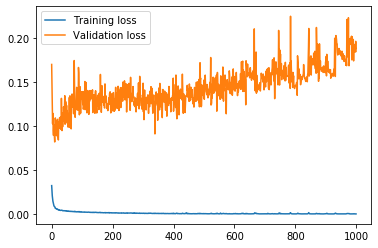

In [72]:
# plot metrics
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='Training loss')
pyplot.plot(history.history['val_loss'], label='Validation loss')

# pyplot.plot(history.history['mean_absolute_percentage_error'])
plt.legend()
pyplot.show()

In [73]:
print(history.history.keys())
print(np.argmin(np.array(history.history['val_loss']))+1)

yhat = model.predict(X_test, verbose=1)
yp = y_scaler.inverse_transform(yhat)
ya = y_scaler.inverse_transform(y_test)

dict_keys(['val_loss', 'loss'])
11
429/429 [==============================] - 0s 125us/step


In [74]:
yp

array([[137.11967, 136.82777],
       [137.04646, 136.8898 ],
       [137.08621, 136.87053],
       [146.834  , 147.30194],
       [151.3965 , 154.58522],
       [136.56416, 138.02402],
       [136.94997, 136.87785],
       [137.26079, 138.2727 ],
       [145.50319, 149.33017],
       [143.39433, 146.85472],
       [139.80106, 145.70451],
       [149.32594, 154.31012],
       [151.11374, 155.38264],
       [147.58815, 150.74994],
       [142.19994, 142.82912],
       [136.86713, 136.76085],
       [138.12682, 138.54456],
       [135.96675, 142.16504],
       [136.06955, 140.4947 ],
       [136.69296, 137.31842],
       [136.93939, 136.87907],
       [136.87059, 136.95778],
       [136.78217, 139.94382],
       [139.79007, 141.20644],
       [136.77507, 137.2531 ],
       [137.00737, 136.90605],
       [136.62695, 139.56137],
       [136.6208 , 138.5673 ],
       [136.65826, 137.27592],
       [136.70825, 137.09456],
       [136.55214, 137.44188],
       [137.06757, 140.06729],
       [

In [75]:
print(yp.shape)
print(ya.shape)

(429, 2)
(429, 2)


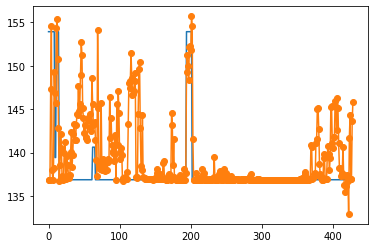

In [76]:
# T1
plt.plot(ya[:,-1:])
plt.plot(yp[:,-1:],marker='o')

# T2
# plt.plot(ya[:,-1:])
# plt.plot(yp[:,-1:],marker='o')

In [77]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(yp, ya))
rms_total = (rms*100)/155
rms_total

2.427950807887072

In [46]:
actual = pd.DataFrame(ya[:,-1:])
pred = pd.DataFrame(yp[:,-1:])
print(actual.shape, pred.shape)
com = pd.concat([actual, pred], axis=1, join='inner')
com.columns = ['Act_T2','Pred_T2']
print(com.shape)
com.to_csv('model1_T2.csv')

(405, 1) (405, 1)
(405, 2)


In [47]:
actual = pd.DataFrame(ya[:,:1])
pred = pd.DataFrame(yp[:,:1])
print(actual.shape, pred.shape)
com = pd.concat([actual, pred], axis=1, join='inner')
com.columns = ['Act_T1','Pred_T1']
print(com.shape)
com.to_csv('model1_T1.csv')

(405, 1) (405, 1)
(405, 2)
